In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from itertools import combinations
%matplotlib inline

In [2]:
# loading iris data
data = load_iris()

In [3]:
# labels of iris features
iris_features = data['feature_names']
print(type(iris_features))
print(iris_features)

<class 'list'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
# iris features data
iris_data = data['data']
print(type(iris_data))
print(iris_data[0:5])

<class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [5]:
# classification classes
iris_target = data['target']
print(type(iris_target))
print(iris_target[0:5])

<class 'numpy.ndarray'>
[0 0 0 0 0]


In [6]:
# names of different iris classes
iris_target_labels = data['target_names']
print(type(iris_target_labels))
print(iris_target_labels)

<class 'numpy.ndarray'>
['setosa' 'versicolor' 'virginica']


In [7]:
# name of target iris classes
iris_target_names = iris_target_labels[iris_target]

In [8]:
# aggregate dataframe
iris_df = pd.DataFrame(iris_data, columns=iris_features)
iris_df['target'] = iris_target
iris_df['iris type'] = iris_target_names
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,iris type
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [9]:
# info on iris_df
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null int32
iris type            150 non-null object
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [10]:
# group iris by types
iris_group = iris_df.groupby('iris type')

In [11]:
# min statistics
iris_group.min()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
iris type,,,,,
setosa,4.3,2.3,1.0,0.1,0
versicolor,4.9,2.0,3.0,1.0,1
virginica,4.9,2.2,4.5,1.4,2


In [12]:
# max statistics
iris_group.max()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
iris type,,,,,
setosa,5.8,4.4,1.9,0.6,0
versicolor,7.0,3.4,5.1,1.8,1
virginica,7.9,3.8,6.9,2.5,2


In [13]:
# mean statistics
iris_group.mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
iris type,,,,,
setosa,5.006,3.428,1.462,0.246,0
versicolor,5.936,2.770,4.260,1.326,1
virginica,6.588,2.974,5.552,2.026,2


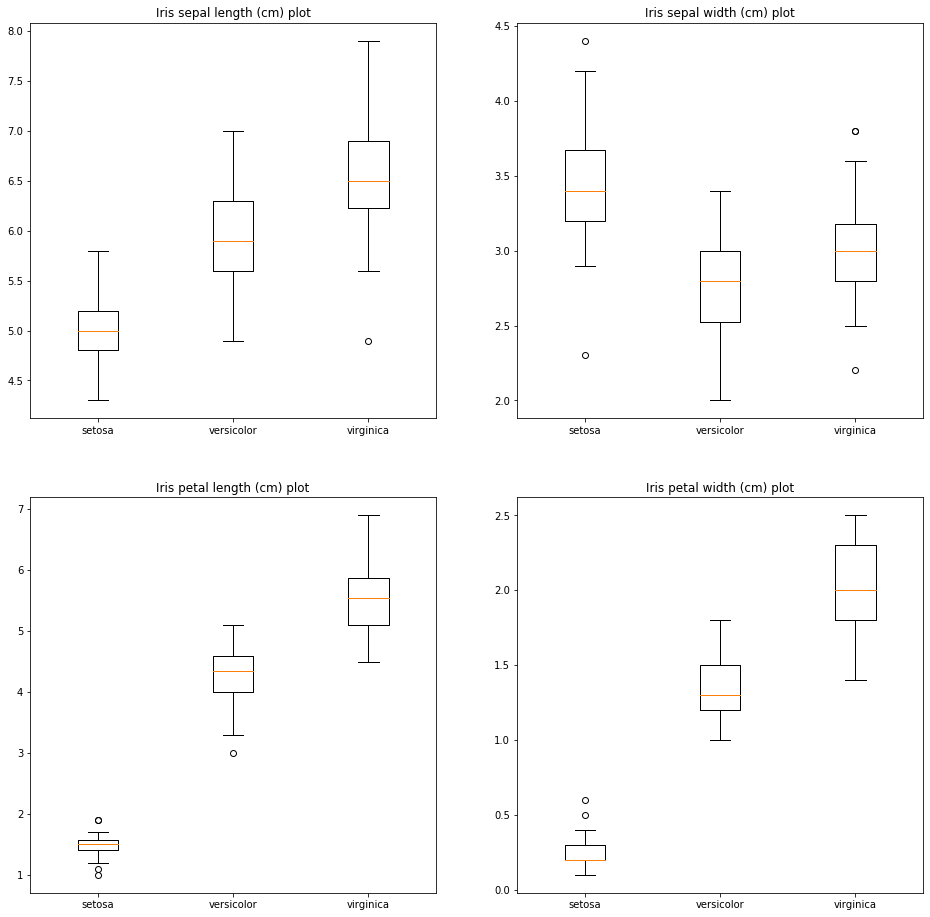

In [14]:
# box whisker plots
attributes = [[iris_df[iris_df['target'] == cls][feat] for cls in range(len(iris_target_labels))] for feat in iris_features]
fig = plt.figure(figsize=(16, 16))

for i, attribute in enumerate(attributes):
    
    ax = fig.add_subplot(2, 2, i + 1)
    ax.title.set_text(f'Iris {iris_features[i]} plot')
    ax.boxplot(attribute, labels=iris_target_labels)
    
plt.show()

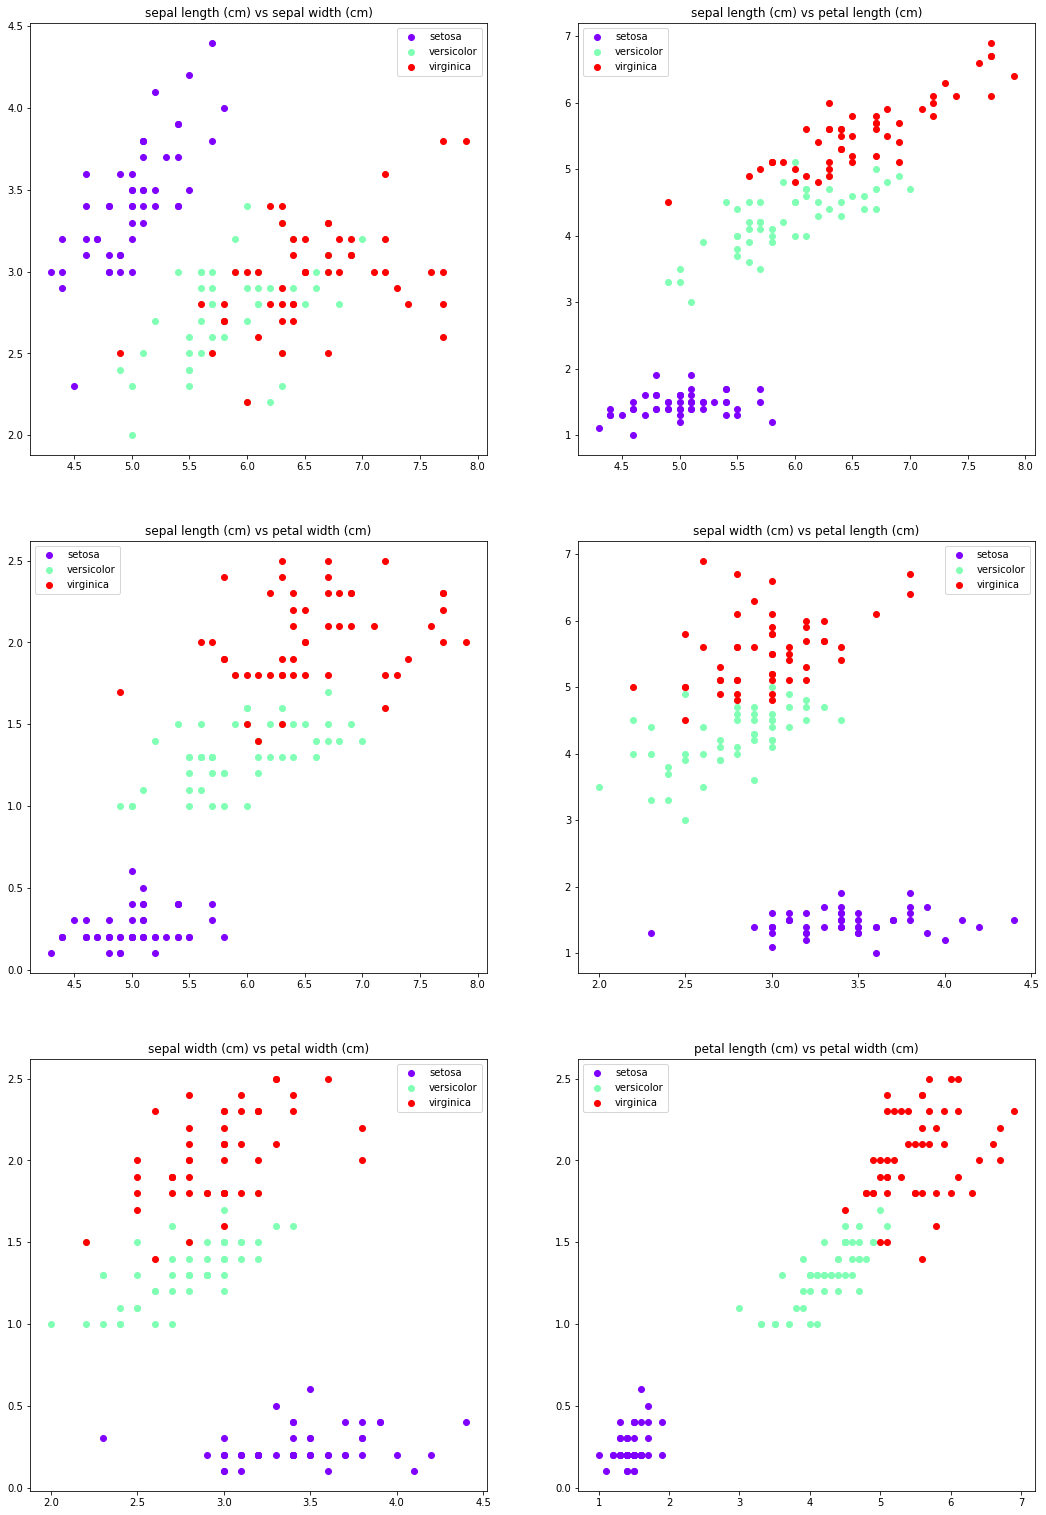

In [15]:
# pair scatter plots
n = 6
size = 2
fig = plt.figure(figsize=(18, 27))
colors = plt.cm.get_cmap('rainbow')(np.linspace(0, 1, len(iris_target_labels)))

for i, (f1, f2) in zip(range(n), combinations(iris_features, size)):
    
    ax = fig.add_subplot(3, 2, i + 1)
    ax.title.set_text(f'{f1} vs {f2}')
    x, y = iris_df[f1], iris_df[f2]
    
    for cls, (clr, lbl) in enumerate(zip(colors, iris_target_labels)):
        msk = iris_df['target'] == cls
        ax.plot(x[msk], y[msk], 'o', color=clr, label=lbl)
        
    ax.legend()
    
plt.show()

In [16]:
# extract data
x = iris_df[iris_features].values
y = iris_df['target'].values

In [17]:
# scale data
x = MinMaxScaler().fit_transform(x)
x[0:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [18]:
# train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=4)
print(x_train.shape)
print(y_train.shape)

(105, 4)
(105,)


In [19]:
# multinomial logistic regression
reg = LogisticRegression(solver='saga', multi_class='multinomial').fit(x_train, y_train)

In [20]:
# test set prediction
y_hat = reg.predict(x_test)
print(f'accuracy on test set: {np.around(np.sum(y_hat == y_test) / len(y_test), decimals=3)}')

accuracy on test set: 0.978
